In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


Zadanie 1

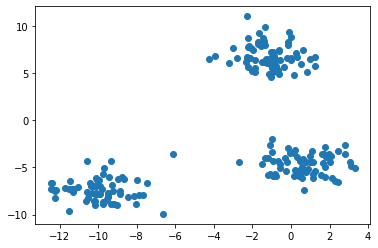

In [38]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Kod pochodzi z: 
https://github.com/wiqaaas/youtube/tree/master/Machine_Learning_from_Scratch/Fuzzy_Clustering

In [39]:
class Fuzzy_Clustering:
    def __init__(self, n_clusters=2, max_iter=150, fuzzines=2, error=1e-5, random_state=42, dist="euclidean", method="Cmeans"):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.fuzzines = fuzzines
        self.error = error
        self.random_state = random_state
        self.dist = dist
        self.method = method
  # inicjalizacja klasy  
       
    def fit(self, X):
        memberships = self._init_mem(X) #inicjalizuję przydział
              
        iteration = 0
        while iteration < self.max_iter:
            membershipsNew = deepcopy(memberships)
            new_class_centers = self._update_centers(X, memberships)#aktualizuje centra klas 
            distance = self._calculate_dist(X,memberships,new_class_centers)#Obliczam dystans (wzór) 
            memberships = self._update_memberships(X, memberships, new_class_centers, distance)#aktualizuje przydział
            iteration += 1
            if norm(memberships - membershipsNew) < self.error:
                break
            
        return memberships, new_class_centers
    
    def _init_mem(self,X):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters

        #inicjalizuję przydział 
        rnd = np.random.RandomState(self.random_state)
        memberships = rnd.rand(n_samples,n_clusters)

        #aktualizuję prztdział odpowiedni do klasy. Te linijki są po to żeby prawdopodobieństwa przynależności do klasy były równe 1 
        summation = memberships.sum(axis=1).reshape(-1,1)
        denominator = np.repeat(summation,n_clusters,axis=1)
        memberships = memberships/denominator
        
        return memberships

    def _update_centers(self, X, memberships):
        fuzzyMem = memberships ** self.fuzzines
        new_class_centers = (np.dot(X.T,fuzzyMem)/np.sum(fuzzyMem,axis=0)).T
        return new_class_centers
    
    def _calculate_fuzzyCov(self,X,memberships,new_class_centers):
        #obliczam macierz kowariancji (wzór)
        fuzzyMem = memberships ** self.fuzzines
        n_clusters = self.n_clusters
        FcovInv_Class = []
        dim = X.shape[1]
        for i in range(n_clusters): 
            diff = X-new_class_centers[i]
            left = np.dot((fuzzyMem[:,i].reshape(-1,1)*diff).T,diff)/np.sum(fuzzyMem[:,i],axis=0)
            Fcov = (np.linalg.det(left)**(-1/dim))*left
            FcovInv = np.linalg.inv(Fcov)
            FcovInv_Class.append(FcovInv)
        return FcovInv_Class

    def _calculate_dist(self,X,memberships,new_class_centers):
        
        if self.method == "Gustafson–Kessel":
            n_clusters = self.n_clusters
            FcovInv_Class = self._calculate_fuzzyCov(X,memberships,new_class_centers)

            #obliczam odległosć mahalanobisa (wzór)
            mahalanobis_Class = []
            for i in range(n_clusters): 
                diff = X-new_class_centers[i]
                left = np.dot(diff,FcovInv_Class[i])    
                mahalanobis = np.diag(np.dot(left,diff.T))
                mahalanobis_Class.append(mahalanobis)
            distance = np.array(mahalanobis_Class).T
            return distance
        
        elif self.method == "Cmeans":
            distance = cdist(X, new_class_centers,metric=self.dist)
            return distance

    def _update_memberships(self, X, memberships, new_class_centers, distance):
        fuzziness = self.fuzzines
        n_clusters = self.n_clusters
        n_samples = X.shape[0]
        
        power = float(2/(fuzziness - 1))
        distance = distance**power
        arr = np.zeros((n_samples,n_clusters))
        for i in range(n_clusters):
            for ii in range(n_clusters):
                arr[:,ii] = ((distance[:,i]/distance[:,ii]))
            memberships[:,i] = 1/np.sum(arr,axis=1)   
        return memberships
    

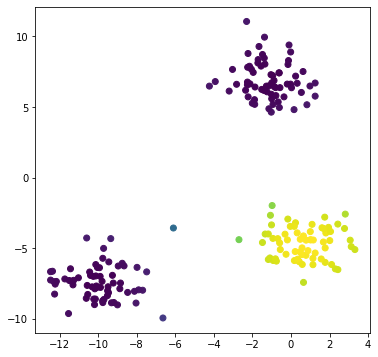

In [40]:
Fclustering = Fuzzy_Clustering(method="Cmeans",n_clusters = 3)
memberships, classCenters = Fclustering.fit(X)
fig= plt.subplots(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=memberships[:,0])


Rozwiązanie z użyciem gotowej implementacji z python'a 

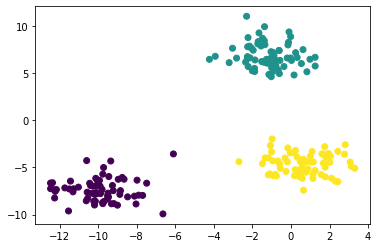

In [41]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

Zadanie 2.

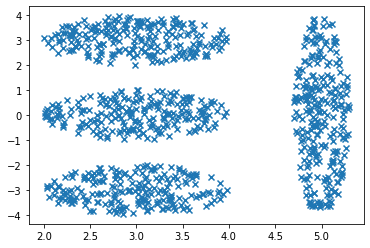

In [42]:
n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

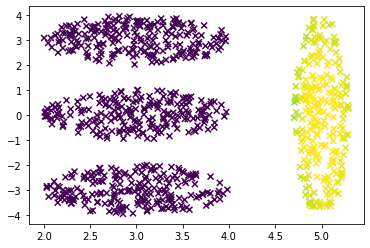

In [43]:
Fclustering = Fuzzy_Clustering(method="Gustafson–Kessel",n_clusters = 4, dist="mahalanobis")
memberships, classCenters = Fclustering.fit(X)
fig = plt.subplots()
plt.scatter(X[:,0], X[:,1], c=memberships[:,0], marker = "x")
